In [1]:
import pandas as pd

pasajeros = pd.read_csv('../_data/international-airline-passengers.csv', sep=";")

pasajeros.columns = ["mes", "pasajeros"]

In [2]:
pasajeros.head()

,mes,pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
pasajeros["pasajeros_1"] = pasajeros["pasajeros"].shift(-1)

In [4]:
pasajeros.tail()

,mes,pasajeros,pasajeros_1
139,1960-08,606,508.0
140,1960-09,508,461.0
141,1960-10,461,390.0
142,1960-11,390,432.0
143,1960-12,432,NaN


In [5]:
pasajeros = pasajeros.drop(143)

In [6]:
pasajeros_x = pasajeros["pasajeros"].astype(float).values
pasajeros_y = pasajeros["pasajeros_1"].astype(float).values


In [7]:
n_periodos = len(pasajeros)
pct_test = 0.2

n_train = int(n_periodos * (1-pct_test))
n_train

114

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(pasajeros_x.reshape(-1,1))

pasajeros_x_std = scaler.transform(pasajeros_x.reshape(-1,1))
pasajeros_y_std = scaler.transform(pasajeros_y.reshape(-1,1))

In [13]:
x_train = pasajeros_x_std[:n_train]
x_test = pasajeros_x_std[n_train:]

y_train = pasajeros_x_std[:n_train]
y_test = pasajeros_x_std[n_train:]

In [14]:
x_train = x_train.reshape(-1,1,1)
x_test = x_test.reshape(-1,1,1)

In [15]:
x_train.shape

(114, 1, 1)

In [20]:
from keras import Sequential
from keras.layers import Dense, LSTM, GRU

In [21]:
modelo_lstm = Sequential()
modelo_lstm.add(GRU(10, input_shape=(1,1)))
modelo_lstm.add(Dense(1))
modelo_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                390       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
modelo_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
modelo_lstm.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
114/114 [==============================] - 2s 2ms/step - loss: 0.6485 - mean_squared_error: 0.6485
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 0.3187 - mean_squared_error: 0.3187
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 7.0589e-04 - mean_squared_error: 7.0589e-04
Epoch 8/100
114/114 [==============================] - 0s 3ms/step - loss: 5.8396e-04 - mean_squared_error: 5.8396e-04
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 5.8133e-04 - mean_squ

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_pred = scaler.inverse_transform(modelo_lstm.predict(x_train))
y_train_original = scaler.inverse_transform(y_train)
error_train = np.sqrt(mean_squared_error(y_train_original, train_pred))

error_train

4/4 [==============================] - 0s 2ms/step


1.1685748898791601

In [24]:
from sklearn.metrics import mean_squared_error

test_pred = scaler.inverse_transform(modelo_lstm.predict(x_test))
y_test_original = scaler.inverse_transform(y_test)
error_test = np.sqrt(mean_squared_error(y_test_original, test_pred))

error_test

1/1 [==============================] - 0s 20ms/step


14.004508239190717

In [25]:
test_pred_plot = np.zeros(pasajeros_y.shape)
test_pred_plot[-test_pred.shape[0]:] = test_pred[:,0]

test_pred_plot[:-test_pred.shape[0]] = np.nan

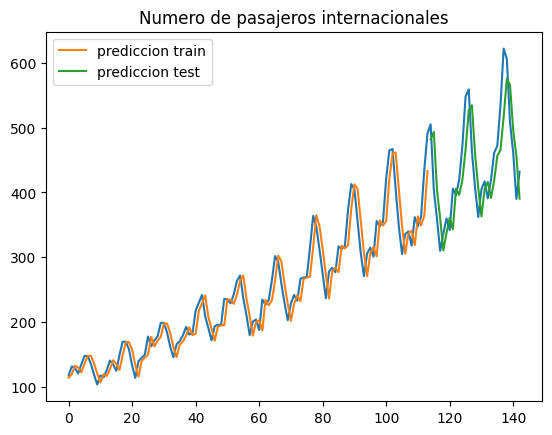

In [26]:
from matplotlib import pyplot as plt
plt.plot(pasajeros_y)
plt.plot(train_pred, label="prediccion train")
plt.plot(test_pred_plot, label="prediccion test")
plt.title("Numero de pasajeros internacionales")
plt.legend();